# Building Machine Learning Models by Integrating Python and SAS® Viya®

## Import packages

In [128]:
import swat
import numpy as np
from numpy import trapezoid
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


## Create a CAS session

When working with CAS, you need to connect to the CAS server and the session is used to established that connection and create a kind of sandbox where the users can manage their data inside a CASUSER library and interact with data located in other libraries based on the rights managed within SAS Viya.

In [89]:
session = swat.CAS(
    "https://server.demo.sas.com/cas-shared-default-http",
    authinfo="/home/sbxxab/.authinfo",
    ssl_ca_list="/home/sbxxab/server.demo.sas.com.cer",
)

## Load external data into CAS

A CAS table can be loaded into memory from many kinds of data sources. In this example, we are loading data directly from a GitHub repository using HTTP protocol. 
The CAS table is loaded from a CSV file and the *tbl* variable will store the pointer to the CAS Table.

In [90]:
data_source = "https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
table_name = "titanic"

tbl = session.read_csv(data_source, table_name)

NOTE: Cloud Analytic Services made the uploaded file available as table TITANIC in caslib CASUSER(student).
NOTE: The table TITANIC has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.


## Explore the data

The *shape* method provides information about the number of rows and columns. 

In [91]:
tbl.shape

(891, np.int64(12))

The *columninfo* method provides information about the variables in the CAS table. 

In [92]:
tbl.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,PassengerId,,1,double,8,12,,0,0
1,Survived,,2,double,8,12,,0,0
2,Pclass,,3,double,8,12,,0,0
3,Name,,4,varchar,82,82,,0,0
4,Sex,,5,varchar,6,6,,0,0
5,Age,,6,double,8,12,,0,0
6,SibSp,,7,double,8,12,,0,0
7,Parch,,8,double,8,12,,0,0
8,Ticket,,9,varchar,18,18,,0,0
9,Fare,,10,double,8,12,,0,0


The *head* method returns a defined number of rows from the table. This is an easy to have a preview of the actual data. 

In [93]:
tbl.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,,S


Using the *describe* method, we can get summary statistics from the table. 

In [130]:
tbl.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714,891,891,891,891,204,889
unique,891,2,3,891,2,88,7,7,681,248,147,3
top,891.0,0.0,3.0,"Zimmerman, Mr. Leo",male,24.0,0.0,0.0,CA. 2343,8.05,G6,S
freq,1.0,549.0,491.0,1.0,577.0,30.0,608.0,678.0,7.0,43.0,4.0,644.0
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.0,0.0,1.0,"Abbing, Mr. Anthony",female,0.42,0.0,0.0,110152,0.0,A10,C
25%,223.0,0.0,2.0,NaN,NaN,20.0,0.0,0.0,NaN,7.8958,NaN,NaN
50%,446.0,0.0,3.0,NaN,NaN,28.0,0.0,0.0,NaN,14.4542,NaN,NaN
75%,669.0,1.0,3.0,NaN,NaN,38.0,1.0,0.0,NaN,31.0,NaN,NaN


## Explore the data using Data Frames

Converting the *tbl* into a data frame gives the users to visualize the data right from their notebook. 

In [95]:
df = tbl.to_frame()

The fact that we use a data frame gives you the opportunity to use familiar Pandas methods and it can also be combined that with other libraries. 

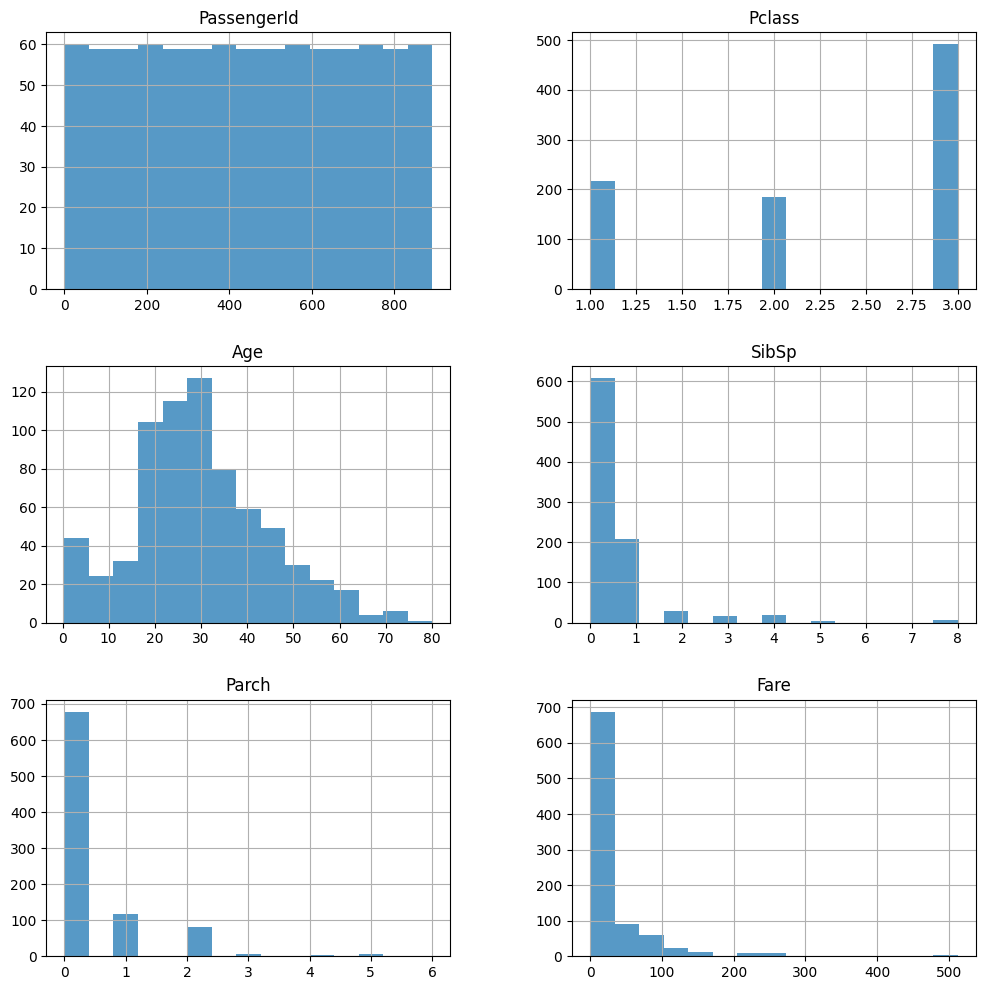

In [96]:
distribution_plot  = df.drop('Survived', axis=1).hist(bins=15, figsize=(12,12), alpha=0.75)

In the example below, you see that we are using Seaborn.

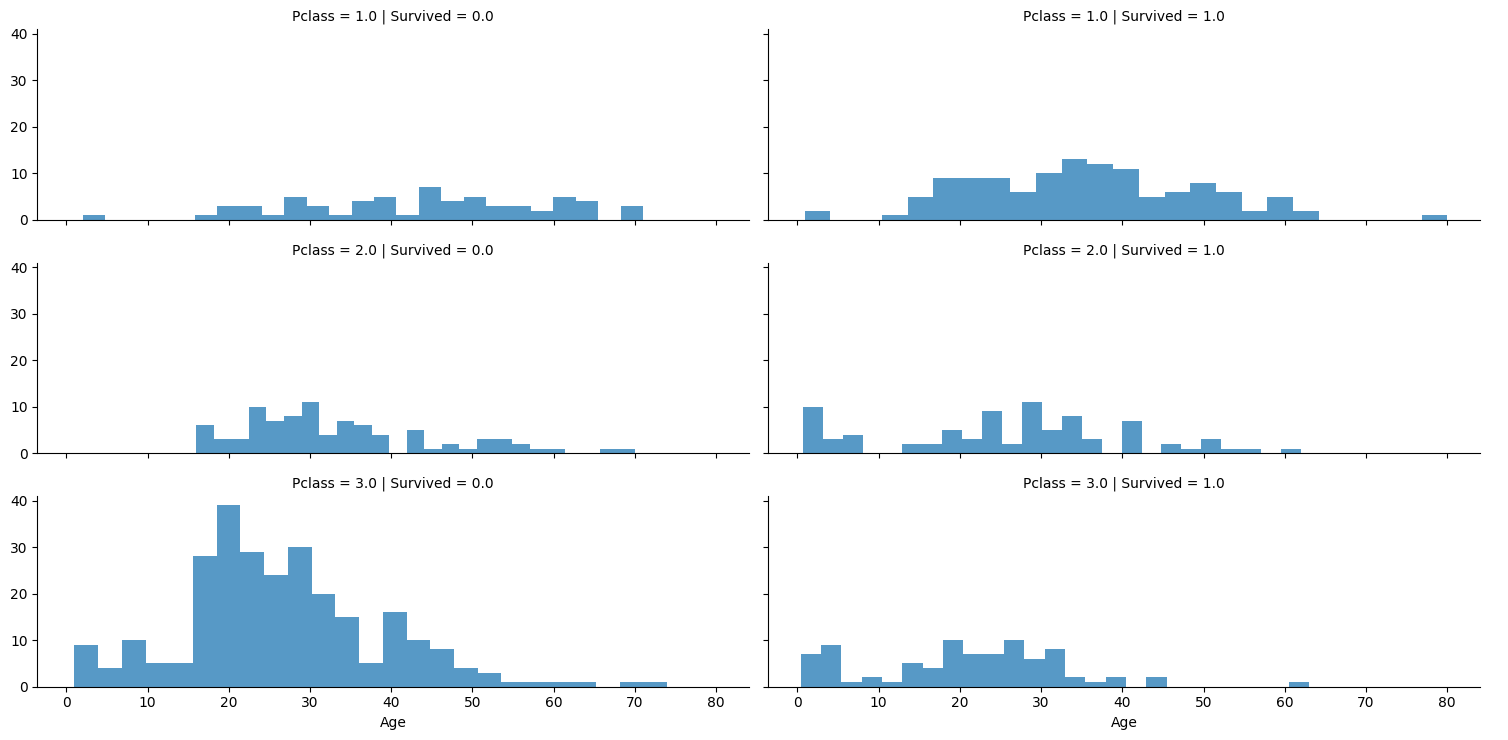

In [ ]:
# For Seaborn Facet Grids, Create an Empty 3 by 2 Graph to Place Data On
pclass_survived = sns.FacetGrid(
    df, col="Survived", row="Pclass", height=2.5, aspect=3
)

# Overlay a Histogram of Y(Age) = Survived
pclass_survived.map(plt.hist, "Age", alpha=0.75, bins=25)

# Add a Legend for Readability
pclass_survived.add_legend()

Text(0.5, 1.0, 'Men')

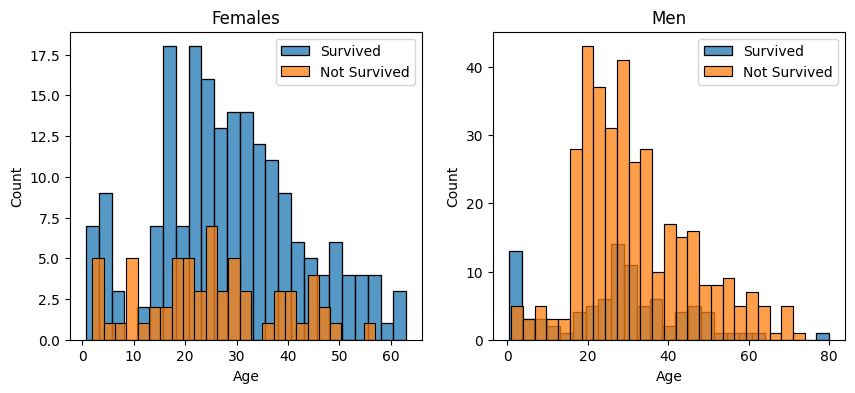

In [98]:
# Create a Graph Canvas - One for Female Survival Rate - One for Male
Survived = "Survived"
Not_Survived = "Not Survived"
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Initialize Women and Male Variables to the Data Set Value
Women = df[df["Sex"] == "female"]
Male = df[df["Sex"] == "male"]

# For the First Graph, Plot the Amount of Women Who Survived Dependent on Their Age
Female_vs_Male = sns.histplot(
    Women[Women["Survived"] == 1].Age.dropna(),
    bins=25,
    label=Survived,
    ax=axes[0],
    kde=False,
)

# For the First Graph, Layer the Amount of Women Who Did Not Survive Dependent on Their Age
Female_vs_Male = sns.histplot(
    Women[Women["Survived"] == 0].Age.dropna(),
    bins=25,
    label=Not_Survived,
    ax=axes[0],
    kde=False,
)

# Display a Legend for the First Graph
Female_vs_Male.legend()
Female_vs_Male.set_title("Females")

# For the Second Graph, Plot the Amount of Men Who Survived Dependent on Their Age
Female_vs_Male = sns.histplot(
    Male[Male["Survived"] == 1].Age.dropna(),
    bins=25,
    label=Survived,
    ax=axes[1],
    kde=False,
)

# For the Second Graph, Layer the Amount of Men Who Did Not Survive Dependent on Their Age
Female_vs_Male = sns.histplot(
    Male[Male["Survived"] == 0].Age.dropna(),
    bins=25,
    label=Not_Survived,
    ax=axes[1],
    kde=False,
)

# Display a Legend for the Second Graph
Female_vs_Male.legend()
Female_vs_Male.set_title("Men")

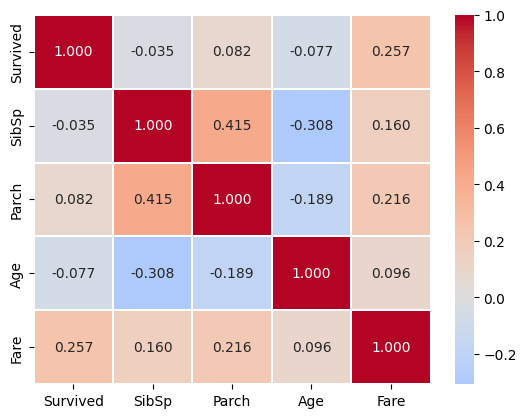

In [99]:
# Heatmap Correlation Matrix That Compares Numerical Values and Survived
Heatmap_Matrix = sns.heatmap(
    df[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(),
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    linewidths=0.1,
)

## Check for missing values

Now that we have a general idea about which features are important, we should clean up any missing values quickly by using CAS. By default, CAS replaces any missing values with the mean, but there are many other modes to choose from.

In [100]:
tbl.distinct()

,Column,NDistinct,NMiss,Trunc
0,PassengerId,891.0,0.0,0.0
1,Survived,2.0,0.0,0.0
2,Pclass,3.0,0.0,0.0
3,Name,891.0,0.0,0.0
4,Sex,2.0,0.0,0.0
5,Age,89.0,177.0,0.0
6,SibSp,7.0,0.0,0.0
7,Parch,7.0,0.0,0.0
8,Ticket,681.0,0.0,0.0
9,Fare,248.0,0.0,0.0


For this test case, we can keep the default because the data set is quite small. We will use the CAS *impute* action to perform a data matrix (variable) imputation that fills in missing values.

In [101]:
session.dataPreprocess.impute(
    table = 'titanic',
    inputs = ['Age'],
    copyAllVars = True,
    casOut = 'titanic_imputed',
)

[ImputeInfo]

 Imputation Information for TITANIC
 
   Variable ImputeTech ResultVar      N  NMiss  ImputedValueContinuous
 0      Age       Mean   IMP_Age  714.0  177.0               29.699118

[OutputCasTables]

              casLib             Name  Rows  Columns                                           casTable
 0  CASUSER(student)  titanic_imputed   891       13  CASTable('titanic_imputed', caslib='CASUSER(st...

+ Elapsed: 0.0281s, user: 0.00494s, sys: 0.00624s, mem: 18.5mb

## Load the data locally to create new features

We will use the same technic as previously to create a pointer to the CAS table and then used to convert the data to a data frame.

In [ ]:
tbl_i = session.CASTable('titanic_imputed')
df_i = tbl_i.to_frame()

Remove Some Features That Are Not Needed for Predictive Modeling

In [ ]:
df_i = df_i[
    ["Embarked", "Parch", "Sex", "Pclass", "SibSp", "Survived", "Fare", "IMP_Age"]
]

After the predictive features are available locally, we can confirm that the CAS statistical imputation worked:

Check How Many Values Are Null by Using the isnull() Function

In [ ]:
total_missing = df_i.isnull().sum().sort_values(ascending=False)
total_missing.head(5)

Find the Total Values

In [ ]:
total = df_i.notnull().sum().sort_values(ascending=False)
total.head(5)

Find the Percentage of Missing Values per Variable

In [ ]:
Percent = df_i.isnull().sum() / df_i.isnull().count() * 100
Percent.sort_values(ascending=False).head(5)

Round to One Decimal Place for Less Storage

In [ ]:
Percent_Rounded = (round(Percent, 1)).sort_values(ascending=False)

Plot the Missing Data [Total Missing, Percentage Missing] with a Concatenation of Two Columns

In [ ]:
Missing_Data = pd.concat(
    [total, total_missing, Percent_Rounded],
    axis=1,
    keys=["Non Missing Values", "Total Missing Values", "% Missing"],
    sort=True,
)
Missing_Data

## Create new features

With machine learning, there are times when you want to create your own features that combine useful information to create a more accurate model. This action can help with overfitting, memory usage, or many other reasons.

This demo shows how to build four new features:

- Relatives
- Alone_on_Ship
- Age_Times_Class
- Fare_Per_Person

#### Relatives and Alone_on_Ship
The **sibsp** feature is the number of siblings and spouses, and the **parch** variable is the number of parents and children. So, you can combine these two for a Relatives feature that indicates how many people someone had on the ship in total. If a passenger traveled completely alone, you can flag that by creating the categorical variable **Alone_on_Ship**

#### Age_Times_Class
As discussed earlier in this demo, both **age** and **class** had an effect on survivability. So, create a new **Age_Times_Class** feature that combines a person’s age and class

#### Fare_Per_Person
The **Fare_Per_Person** variable is created by dividing the **Fare** variable by the **Relatives** variable and then adding 1, which accounts for the passenger

In [ ]:
data = [df_i]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone_On_Ship'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Alone_On_Ship'] = 1
    dataset['Alone_On_Ship'] = dataset['Alone_On_Ship'].astype(int)

    dataset["Age_Times_Class"] = dataset["IMP_Age"] * dataset["Pclass"]

    dataset["Fare_Per_Person"] = dataset["Fare"] / (dataset["Relatives"] + 1)
    dataset["Sib_Div_Spouse"] = dataset["SibSp"]
    dataset["Parents_Div_Children"] = dataset["Parch"]

# Drop useless features
df_i = df_i.drop(["SibSp", "Parch"], axis=1)
# Display some data
df_i.head(5)

,Embarked,Sex,Pclass,Survived,Fare,IMP_Age,Relatives,Alone_On_Ship,Age_Times_Class,Fare_Per_Person,Sib_Div_Spouse,Parents_Div_Children
0,S,male,3.0,0.0,7.2500,22.0,1.0,0,66.0,3.62500,1.0,0.0
1,C,female,1.0,1.0,71.2833,38.0,1.0,0,38.0,35.64165,1.0,0.0
2,S,female,3.0,1.0,7.9250,26.0,0.0,1,78.0,7.92500,0.0,0.0
3,S,female,1.0,1.0,53.1000,35.0,1.0,0,35.0,26.55000,1.0,0.0
4,S,male,3.0,0.0,8.0500,35.0,0.0,1,105.0,8.05000,0.0,0.0


##  Load the data back into CAS for model training

In [106]:
session.upload_frame(df_i, casout="titanic_prepared")

NOTE: Cloud Analytic Services made the uploaded file available as table TITANIC_PREPARED in caslib CASUSER(student).
NOTE: The table TITANIC_PREPARED has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.


CASTable('TITANIC_PREPARED', caslib='CASUSER(student)')

## Create a testing and training set

One of the awesome things about CAS machine learning is that you do not have to manually separate the data set. Instead, you can run a partitioning function and then model and test based on these parameters. To do this, you need to load the *Sampling* action set. Then, you can call the *srs* action, which can quickly partition a data table.

This code partitions the data and adds a unique identifier to the data row to indicate whether it is testing or training. The unique identifier is _PartInd_. When a data row has this identifier equal to 0, it is part of the testing set. Similarly, when it is equal to 1, the data row is part of the training set.

In [107]:
session.loadactionset("sampling")

session.sampling.srs(table="titanic_prepared", samppct=80, partind= True, output = dict(casout="titanic_train", copyVars = 'All'))

NOTE: Added action set 'sampling'.
NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=1166231182 for sampling.


[OutputCasTables]

              casLib           Name Label  Rows  Columns                                           casTable
 0  CASUSER(student)  titanic_train         891       13  CASTable('titanic_train', caslib='CASUSER(stud...

[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0   891    713

+ Elapsed: 0.0225s, user: 0.0167s, sys: 0.00877s, mem: 19.6mb

## Build various models with CAS

One of my favorite parts about machine learning with CAS is how simple building a model is. With looping, you can dynamically change the targets, inputs, and nominal variables. If you are trying to build an extremely accurate model, it would be a great solution.

Building a model with CAS requires you to do a few things:

- Load the action set (in this demo, a forest model, decision tree, and gradient boosting model)
- Set your model variables (targets, inputs, and nominals)
- Train the model

In [108]:
# Load the decisionTree CAS Action Set
session.loadActionSet("decisionTree")

# Set Out Target for Predictive Modeling
target = "Survived"

# Set Inputs to Use to Predict Survived (Numerical Variable Inputs)
inputs = [
    "Sex",
    "Pclass",
    "Alone_On_Ship",
    "Age_Times_Class",
    "Relatives",
    "IMP_Age",
    "Fare",
    "Fare_Per_Person",
    "Embarked",
]

# Set Nominal Variables to Use in Model (Categorial Variable Inputs)
nominals = ["Sex", "Pclass", "Alone_On_Ship", "Embarked", "Survived"]

# Train the Forest Model
session.decisionTree.forestTrain(
    table=dict(name="titanic_train", where="_PartInd_ = 1"),
    target=target,
    inputs=inputs,
    nominals=nominals,
    casOut=dict(name="titanic_forest_model", replace=True),
)

NOTE: Added action set 'decisionTree'.


,Descr,Value
0,Number of Trees,50.000000
1,Number of Selected Variables (M),3.000000
2,Random Number Seed,0.000000
3,Bootstrap Percentage (%),63.212056
4,Number of Bins,50.000000
5,Number of Variables,9.000000
6,Confidence Level for Pruning,0.250000
7,Max Number of Tree Nodes,41.000000
8,Min Number of Tree Nodes,13.000000
9,Max Number of Branches,2.000000


Why does the input table have a WHERE clause? That is because you are looking at rows that contain the training flag, which was created with the srs action.
As you've seen after runnin the block of code, you also get a response from CAS detailing how the model was trained, including great parameters like Number of Trees, Confidence Level for Pruning, and Max Number of Tree Nodes. If you wanted to do hyper-parameter tuning, this output shows you what the model currently looks like before you even adjust how it executes.



In [109]:
# Train the Decision Tree Model
session.decisionTree.forestTrain(
    table=dict(name="titanic_train", where="_PartInd_ = 1"),
    target=target,
    inputs=inputs,
    nominals=nominals,
    casOut=dict(name="titanic_decisiontree_model", replace=True),
)

,Descr,Value
0,Number of Trees,50.000000
1,Number of Selected Variables (M),3.000000
2,Random Number Seed,0.000000
3,Bootstrap Percentage (%),63.212056
4,Number of Bins,50.000000
5,Number of Variables,9.000000
6,Confidence Level for Pruning,0.250000
7,Max Number of Tree Nodes,41.000000
8,Min Number of Tree Nodes,15.000000
9,Max Number of Branches,2.000000


In [110]:
# Train the Gradient Boosting Model
session.decisionTree.gbtreeTrain(
    table=dict(name="titanic_train", where="_PartInd_ = 1"),
    target=target,
    inputs=inputs,
    nominals=nominals,
    casOut=dict(name="titanic_gradient_model", replace=True),
)

,Descr,Value
0,Number of Trees,50.0
1,Distribution,2.0
2,Learning Rate,0.1
3,Subsampling Rate,0.5
4,Number of Selected Variables (M),9.0
5,Number of Bins,50.0
6,Number of Variables,9.0
7,Max Number of Tree Nodes,31.0
8,Min Number of Tree Nodes,19.0
9,Max Number of Branches,2.0


## Score the models

How do you score the models with CAS? CAS has a score function for each model that is built. This function generates a new table that contains how the model performed on each data input.

In [111]:
titanic_forest_score = session.decisionTree.forestScore(
    table=dict(name="titanic_train", where="_PartInd_ = 0"),
    model="titanic_forest_model",
    casout=dict(name="titanic_forest_score", replace=True),
    copyVars=target,
    encodename=True,
    assessonerow=True,
)

titanic_decisiontree_score = session.decisionTree.dtreeScore(
    table=dict(name="titanic_train", where="_PartInd_ = 0"),
    model="titanic_decisiontree_model",
    casout=dict(name="titanic_decisiontree_score", replace=True),
    copyVars=target,
    encodename=True,
    assessonerow=True,
)

titanic_gradient_score = session.decisionTree.gbtreeScore(
    table=dict(name="titanic_train", where="_PartInd_ = 0"),
    model="titanic_gradient_model",
    casout=dict(name="titanic_gradient_score", replace=True),
    copyVars=target,
    encodename=True,
    assessonerow=True,
)

When the scoring function is running, it creates the new variables P_survived1, which is the prediction for whether a passenger survived or not, and P_survived0, which is the prediction for whether the passenger did not survive. With this scoring function, you can see how accurately a model could correctly classify passengers on the testing set.
If you dive deeper into the Python object, this scoring function is set as equal to, so you can actually see the misclassification rate!

For example, examine how the forest model did by running this code:

In [112]:
titanic_forest_score

[EncodedName]

         LEVNAME  LEVINDEX      VARNAME
 0             1         0  P_Survived1
 1             0         1  P_Survived0

[EncodedTargetName]

   LEVNAME  LEVINDEX     VARNAME
 0                 0  I_Survived

[OutputCasTables]

              casLib                  Name  Rows  Columns                                           casTable
 0  CASUSER(student)  titanic_forest_score   178        6  CASTable('titanic_forest_score', caslib='CASUS...

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                               178
 1  Number of Observations Used                               178
 2  Misclassification Error (%)                      20.224719101

+ Elapsed: 0.0212s, user: 0.0138s, sys: 0.0115s, mem: 21.3mb

The scoring function read in all of the model-tested set and told you the misclassification error. By calculating [1 – Misclassification Error], you can see that the model was approximately 85% accurate. For barely exploring the data and testing and training on a small data set, this score is good. These scores can be misleading though, as they do not tell the entire story. Do you have more false positives or false negatives? When it comes to predicting human survival, those parameters are important to investigate.

To analyze that, load the percentile CAS action set. This action set provides actions for calculating percentiles and box plot values. In your case, it also assesses models. With this information, CAS has an assess function to determine a final assessment of how the model did.

In [113]:
session.loadActionSet("percentile")
prediction = "P_survived1"

titanic_forest_assessed = session.percentile.assess(
    table="titanic_forest_score",
    inputs=prediction,
    casout=dict(name="titanic_forest_assessed", replace=True),
    includeRoc=True,
    response=target,
    event="1",
)

titanic_decisiontree_assessed = session.percentile.assess(
    table="titanic_decisiontree_score",
    inputs=prediction,
    casout=dict(name="titanic_decisiontree_assessed", replace=True),
    includeRoc=True,
    response=target,
    event="1",
)

titanic_gradient_assessed = session.percentile.assess(
    table="titanic_gradient_score",
    inputs=prediction,
    casout=dict(name="titanic_gradient_assessed", replace=True),
    includeRoc=True,
    response=target,
    event="1",
)

NOTE: Added action set 'percentile'.


This CAS action returns three types of assessments: 
- Lift-related assessments
- ROC-related assessments
- Concordance statistics

In [114]:
titanic_decisiontree_assessed

,casLib,Name,Rows,Columns,casTable
0,CASUSER(student),titanic_decisiontree_assessed,20,21,"CASTable('titanic_decisiontree_assessed', casl..."
1,CASUSER(student),titanic_decisiontree_assessed_ROC,100,22,"CASTable('titanic_decisiontree_assessed_ROC', ..."


## Analyze the results locally

You can plot the receiver operating characteristic (ROC) curve and the cumulative lift to determine how the models performed. Using the ROC curve, you can then calculate the area under the ROC curve (AUC) to see overall how well the models predicted the survival rate.

What exactly is a ROC curve or lift?

A ROC curve is determined by plotting the true positive rate (TPR) against the false positive rate. The true positive rate is the proportional observations that were correctly predicted to be positive. The false positive rate is the proportional observations that were incorrectly predicted to be positive.
A lift chart is derived from a gains chart. The X axis acts as a percentile, but the Y axis is the ratio of the gains value of our model and the gains value of a model that is choosing passengers randomly. That is, it details how many times the model is better than the random choice of cases.

Before you can plot these tables locally, you need to create a connection to them. CAS created some new assessed tables, so create a connection to these CAS tables for analysis

In [115]:
# Assess Forest
titanic_assess_ROC_Forest = session.CASTable("titanic_forest_assessed_ROC")
titanic_assess_Lift_Forest = session.CASTable("titanic_forest_assessed")

titanic_ROC_pandas_Forest = titanic_assess_ROC_Forest.to_frame()
titanic_Lift_pandas_Forest = titanic_assess_Lift_Forest.to_frame()

# Assess Decision Tree
titanic_assess_ROC_DT = session.CASTable("titanic_decisiontree_assessed_ROC")
titanic_assess_Lift_DT = session.CASTable("titanic_decisiontree_assessed")

titanic_ROC_pandas_DT = titanic_assess_ROC_DT.to_frame()
titanic_Lift_pandas_DT = titanic_assess_Lift_DT.to_frame()

# Assess GB
titanic_assess_ROC_gb = session.CASTable("titanic_gradient_assessed_ROC")
titanic_assess_Lift_gb = session.CASTable("titanic_gradient_assessed")

titanic_ROC_pandas_gb = titanic_assess_ROC_gb.to_frame()
titanic_Lift_pandas_gb = titanic_assess_Lift_gb.to_frame()


Now that there is a connection to these tables, you can use the Matplotlib library to plot the ROC curve. Plot each model on this graph to see which model performed the best

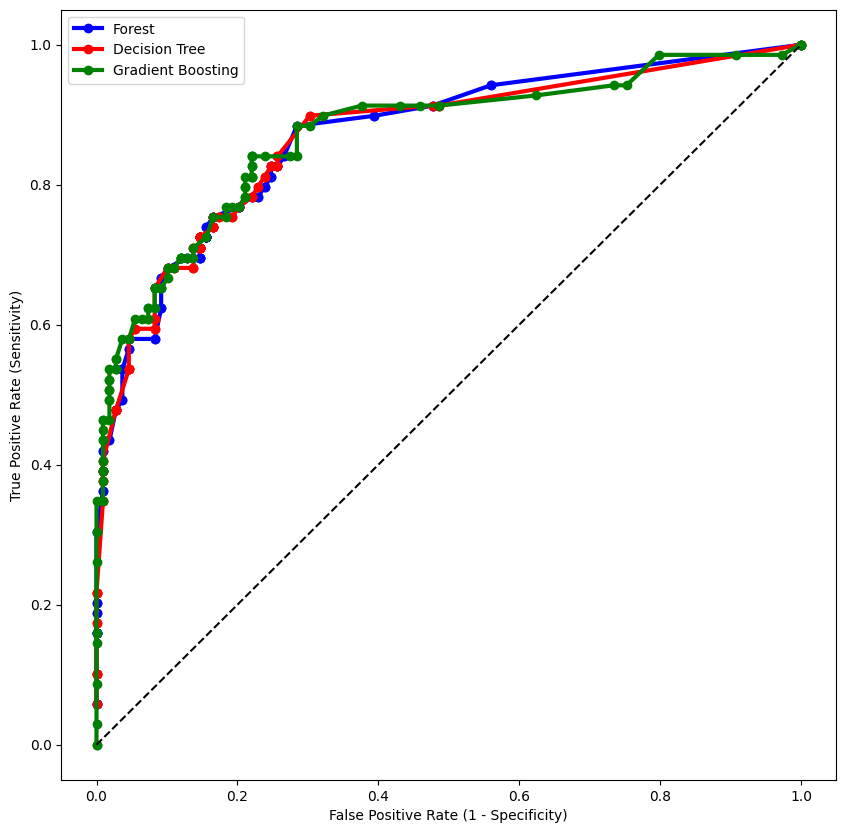

In [116]:
# Plot ROC Locally
plt.figure(figsize=(10, 10))
plt.plot(
    1 - titanic_ROC_pandas_Forest["_Specificity_"],
    titanic_ROC_pandas_Forest["_Sensitivity_"],
    "bo-",
    linewidth=3,
)
plt.plot(
    1 - titanic_ROC_pandas_DT["_Specificity_"],
    titanic_ROC_pandas_DT["_Sensitivity_"],
    "ro-",
    linewidth=3,
)
plt.plot(
    1 - titanic_ROC_pandas_gb["_Specificity_"],
    titanic_ROC_pandas_gb["_Sensitivity_"],
    "go-",
    linewidth=3,
)
plt.plot(pd.Series(range(0, 11, 1)) / 10, pd.Series(range(0, 11, 1)) / 10, "k--")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(["Forest", "Decision Tree", "Gradient Boosting"])
plt.show()

You can also take the depth and cumulative lift scores from the assessed data set and plot that information

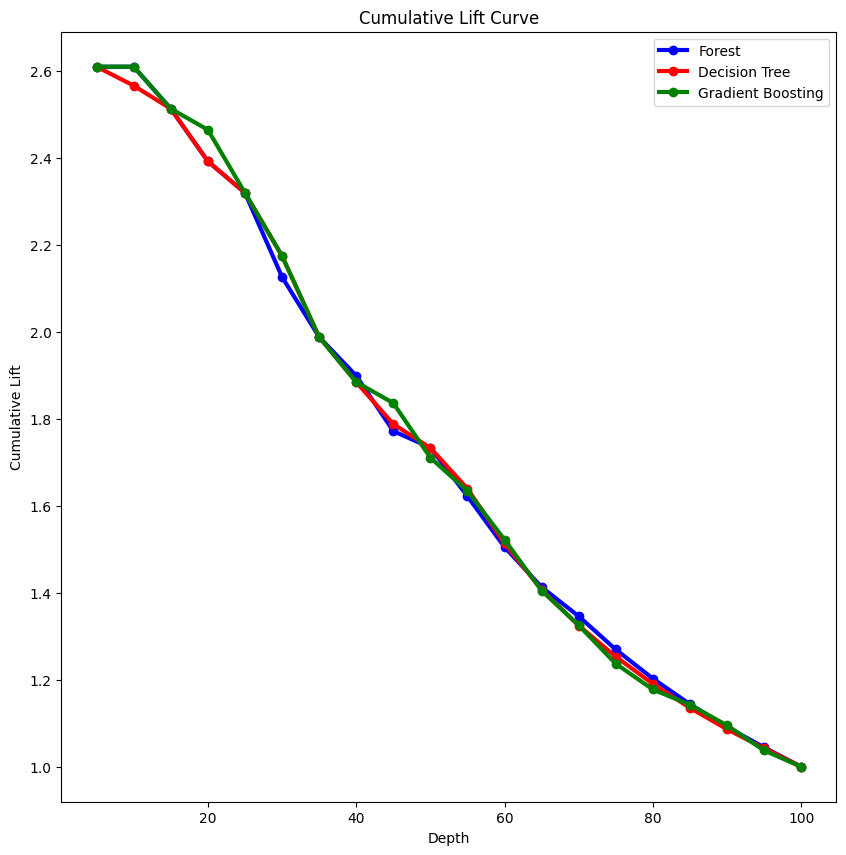

In [117]:
# Plot Lift Locally
plt.figure(figsize=(10, 10))
plt.plot(
    titanic_Lift_pandas_Forest["_Depth_"],
    titanic_Lift_pandas_Forest["_CumLift_"],
    "bo-",
    linewidth=3,
)
plt.plot(
    titanic_Lift_pandas_DT["_Depth_"],
    titanic_Lift_pandas_DT["_CumLift_"],
    "ro-",
    linewidth=3,
)
plt.plot(
    titanic_Lift_pandas_gb["_Depth_"],
    titanic_Lift_pandas_gb["_CumLift_"],
    "go-",
    linewidth=3,
)
plt.xlabel("Depth")
plt.ylabel("Cumulative Lift")
plt.title("Cumulative Lift Curve")
plt.legend(["Forest", "Decision Tree", "Gradient Boosting"])
plt.show()

Although these curves work well for exploring the model success and perhaps how you can better tune the data, typically most people just want to see overall how well the model performed. To get a general idea, you can integrate the ROC curve to get this overview. This area is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

In [118]:
# Forest Scores
x_forest = np.array([titanic_ROC_pandas_Forest["_Specificity_"]])
y_forest = np.array([titanic_ROC_pandas_Forest["_Sensitivity_"]])

# Decision Tree Scores
x_dt = np.array([titanic_ROC_pandas_DT["_Specificity_"]])
y_dt = np.array([titanic_ROC_pandas_DT["_Sensitivity_"]])

# GB Scores
x_gb = np.array([titanic_ROC_pandas_gb["_Specificity_"]])
y_gb = np.array([titanic_ROC_pandas_gb["_Sensitivity_"]])

# Calculate Area Under Curve (Integrate)
area_forest = trapezoid(y_forest, x_forest)
area_dt = trapezoid(y_dt, x_dt)
area_gb = trapezoid(y_gb, x_gb)

# Table For Model Scores
Model_Results = pd.DataFrame(
    {
        "Model": ["Forest", "Decision Tree", "Gradient Boosting"],
        "Score": [area_forest, area_dt, area_gb],
    }
)

Model_Results

,Model,Score
0,Forest,[0.87096130833665]
1,Decision Tree,[0.8681691264459432]
2,Gradient Boosting,[0.872091477197172]


With the AUC ROC score, you can now see how well the model performs at distinguishing between positive and negative outcomes.

In [ ]:
session.close()